In [47]:
# import
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.utils import to_categorical

데이터 불러오기

In [2]:
df = pd.read_csv('test.csv')
df

,id,img_path
0,TEST_000,./test/000.png
1,TEST_001,./test/001.png
2,TEST_002,./test/002.png
3,TEST_003,./test/003.png
4,TEST_004,./test/004.png
...,...,...
787,TEST_787,./test/787.png
788,TEST_788,./test/788.png
789,TEST_789,./test/789.png
790,TEST_790,./test/790.png


데이터 전처리

In [ ]:
for dirname, _, filenames in os.walk('./test/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [31]:
base_dir = './train/'
data = []
for dirname, _, filenames in os.walk(base_dir):
    for filename in filenames:
        # 경로에서 \를 /로 변경하여 출력
        image_path = os.path.join(dirname, filename).replace("\\", "/")
        category = dirname.split("/")[-1]
        data.append({'Category': category, 'Image_Path': image_path})
        print(image_path)

train_df = pd.DataFrame(data)
train_df

./train/가구수정/0.png
./train/가구수정/1.png
./train/가구수정/10.png
./train/가구수정/11.png
./train/가구수정/2.png
./train/가구수정/3.png
./train/가구수정/4.png
./train/가구수정/5.png
./train/가구수정/6.png
./train/가구수정/7.png
./train/가구수정/8.png
./train/가구수정/9.png
./train/걸레받이수정/0.png
./train/걸레받이수정/1.png
./train/걸레받이수정/10.png
./train/걸레받이수정/100.png
./train/걸레받이수정/101.png
./train/걸레받이수정/102.png
./train/걸레받이수정/103.png
./train/걸레받이수정/104.png
./train/걸레받이수정/105.png
./train/걸레받이수정/106.png
./train/걸레받이수정/107.png
./train/걸레받이수정/108.png
./train/걸레받이수정/109.png
./train/걸레받이수정/11.png
./train/걸레받이수정/110.png
./train/걸레받이수정/111.png
./train/걸레받이수정/112.png
./train/걸레받이수정/113.png
./train/걸레받이수정/114.png
./train/걸레받이수정/115.png
./train/걸레받이수정/116.png
./train/걸레받이수정/117.png
./train/걸레받이수정/118.png
./train/걸레받이수정/119.png
./train/걸레받이수정/12.png
./train/걸레받이수정/120.png
./train/걸레받이수정/121.png
./train/걸레받이수정/122.png
./train/걸레받이수정/123.png
./train/걸레받이수정/124.png
./train/걸레받이수정/125.png
./train/걸레받이수정/126.png
./train/걸레받이수정/127.png
./train/걸레받이수정/128

,Category,Image_Path
0,가구수정,./train/가구수정/0.png
1,가구수정,./train/가구수정/1.png
2,가구수정,./train/가구수정/10.png
3,가구수정,./train/가구수정/11.png
4,가구수정,./train/가구수정/2.png
...,...,...
3452,훼손,./train/훼손/995.png
3453,훼손,./train/훼손/996.png
3454,훼손,./train/훼손/997.png
3455,훼손,./train/훼손/998.png


카테고리별 이미지 확인

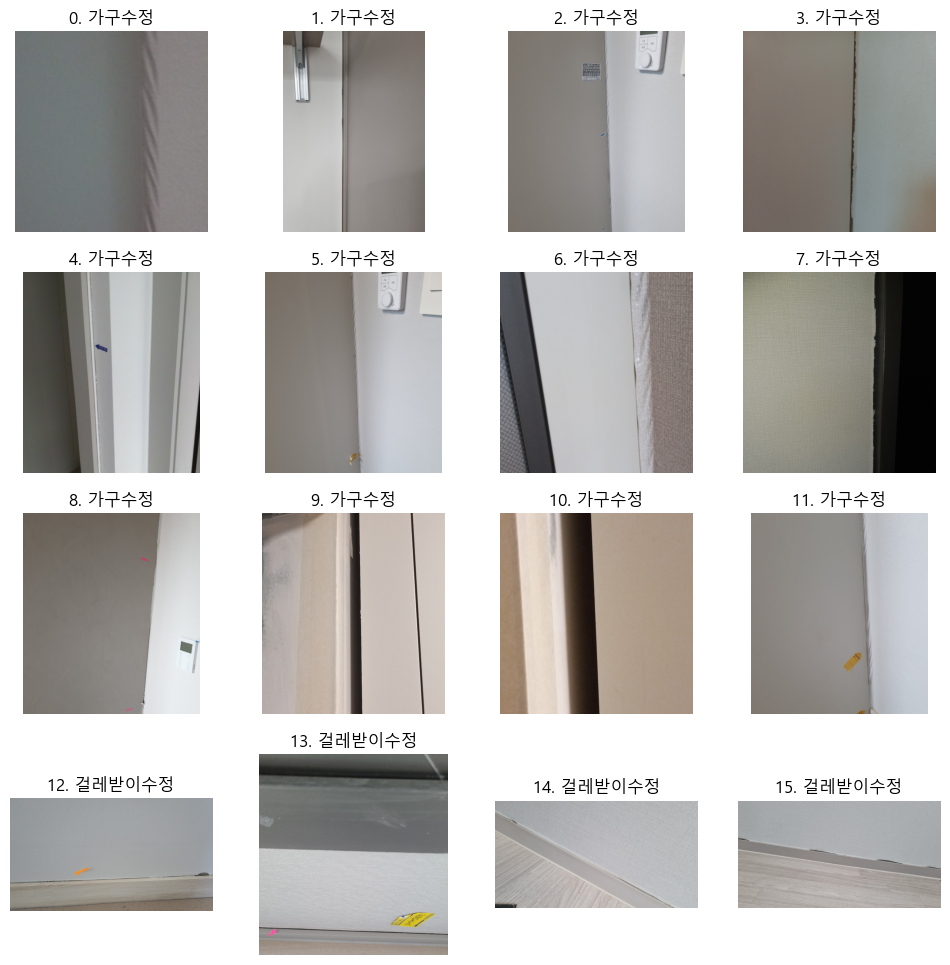

In [45]:
# 실제로 어떤 사진들로 구성되어 있는지 이미지와 라벨 출력하여 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize = (12,12))
for i in range(16):
    image_id = train_df.loc[i, 'Image_Path']
    plt.subplot(4,4, i+1)
    plt.imshow(plt.imread(image_id))
    plt.title(str(i) + '. ' + train_df.loc[i, 'Category'])
    plt.axis('off')

plt.show()

In [48]:
train_df.shape()

TypeError: 'tuple' object is not callable